(assignment_3)=
# Assignment 3: Basin-scale flows and waves

For this assignment you will do quantiative analysis of the basin flow (see {ref}`assignment_2`), and a qualitative analysis of planetary-scale waves in a basin.

## Q1.1  Ekman pumping

For both the f- and beta-plane simulations (`basinfplane` and `basinbetaplane`) there should be a convergence of fluid towards the central latitude of the basin.  Show that, in steady state, this fluid is being pushed downwards at a rate expected by the wind forcing.

### Q1.1.a Determine depth of Ekman layer

Plot cross sections of `v(x, z)` at a couple of locations north and south of the central value of y, and estimate how deep the Ekman layer is. Compare with the theoretical Ekman depth.  



In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

def subplots_shared(n, m, sharex=True, sharey=True, layout='constrained', figsize=None):
    return plt.subplots(n, m, sharex=sharex, sharey=sharey, layout=layout, figsize=figsize)

def pcolormesh_sym(x, y, z, vbound, ax=None, cmap='RdBu_r'):
    if ax is None:
        ax = plt.gca()
    return ax.pcolormesh(x, y, z, vmin=-vbound, vmax=vbound, cmap=cmap, rasterized=True)

def tohours(Time):
    return Time.values.astype('float') / 1e9 /3600


In [ ]:
# use the matplotlib widget
%matplotlib widget

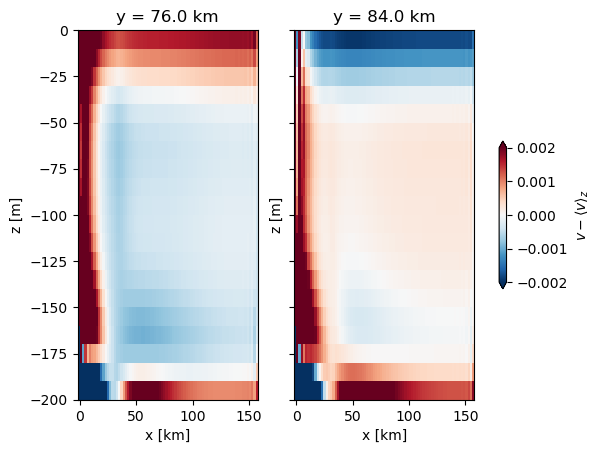

In [2]:
with xr.open_dataset('basinbetaplane.snapshot.nc') as ds:
    ds = ds.isel(Time=50)
    fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
    ax = axs[0]
    pc = ax.pcolormesh(ds.xt, ds.zt, ds.v.isel(yu=38)-ds.v.isel(yu=42).mean(dim='zt'),
                      vmin=-0.002, vmax=0.002, cmap='RdBu_r')
    ax.set_title(f'y = {ds.yu[38].values} km')
    ax.set_xlabel('x [km]')
    ax.set_ylabel('z [m]')
    
    ax = axs[1]
    pc = ax.pcolormesh(ds.xt, ds.zt, ds.v.isel(yu=42)-ds.v.isel(yu=42).mean(dim='zt'),
                      vmin=-0.002, vmax=0.002, cmap='RdBu_r')
    ax.set_title(f'y = {ds.yu[42].values} km')
    ax.set_xlabel('x [km]')
    ax.set_ylabel('z [m]')
    fig.colorbar(pc, ax = axs, shrink=0.4, extend='both', label=r'$v - \left<v\right>_z$')

If we subtract the depth-mean velocity, we see that the Ekman layers are about 5 cells thick.  

### Q1.1b  Vertical velocity.

Plot structure of w at base of Ekman layer, and comment on the structure.  

```{hint} 
Beware not to let the colour limits focus too much on the sides of the basin.
```

Discuss the structure, and note what is happeneing at the sidewalls (why?)


<xarray.Dataset>
Dimensions:            (xt: 80, xu: 80, yt: 80, yu: 80, zt: 20, zw: 20,
                        tensor1: 2, tensor2: 2, Time: 240)
Coordinates:
  * xt                 (xt) float64 -1.0 1.0 3.0 5.0 ... 151.0 153.0 155.0 157.0
  * xu                 (xu) float64 0.0 2.0 4.0 6.0 ... 152.0 154.0 156.0 158.0
  * yt                 (yt) float64 -1.0 1.0 3.0 5.0 ... 151.0 153.0 155.0 157.0
  * yu                 (yu) float64 0.0 2.0 4.0 6.0 ... 152.0 154.0 156.0 158.0
  * zt                 (zt) float64 -195.0 -185.0 -175.0 ... -25.0 -15.0 -5.0
  * zw                 (zw) float64 -190.0 -180.0 -170.0 ... -20.0 -10.0 0.0
  * tensor1            (tensor1) float64 0.0 1.0
  * tensor2            (tensor2) float64 0.0 1.0
  * Time               (Time) timedelta64[ns] 01:00:00.000028800 ... 10 days ...
Data variables: (12/33)
    dxt                (xt) float64 ...
    dxu                (xu) float64 ...
    dyt                (yt) float64 ...
    dyu                (yu) float64 ...
    dzt                (zt) float64 ...
    dzw                (zw) float64 ...
    ...                 ...
    kappaM             (Time, zt, yt, xt) float64 ...
    kappaH             (Time, zw, yt, xt) float64 ...
    surface_taux       (Time, yt, xu) float64 ...
    surface_tauy       (Time, yu, xt) float64 ...
    forc_rho_surface   (Time, yt, xt) float64 ...
    psi                (Time, yt, xt) float64 ...
Attributes:
    date_created:      2023-08-17T21:31:35.909838
    veros_version:     1.4.2+365.gfd1e6a5
    setup_identifier:  basinfplane

<xarray.Dataset>
Dimensions:            (xt: 80, xu: 80, yt: 80, yu: 80, zt: 20, zw: 20,
                        tensor1: 2, tensor2: 2, Time: 240)
Coordinates:
  * xt                 (xt) float64 -1.0 1.0 3.0 5.0 ... 151.0 153.0 155.0 157.0
  * xu                 (xu) float64 0.0 2.0 4.0 6.0 ... 152.0 154.0 156.0 158.0
  * yt                 (yt) float64 -1.0 1.0 3.0 5.0 ... 151.0 153.0 155.0 157.0
  * yu                 (yu) float64 0.0 2.0 4.0 6.0 ... 152.0 154.0 156.0 158.0
  * zt                 (zt) float64 -195.0 -185.0 -175.0 ... -25.0 -15.0 -5.0
  * zw                 (zw) float64 -190.0 -180.0 -170.0 ... -20.0 -10.0 0.0
  * tensor1            (tensor1) float64 0.0 1.0
  * tensor2            (tensor2) float64 0.0 1.0
  * Time               (Time) timedelta64[ns] 01:00:00.000028800 ... 10 days ...
Data variables: (12/33)
    dxt                (xt) float64 ...
    dxu                (xu) float64 ...
    dyt                (yt) float64 ...
    dyu                (yu) float64 ...
    dzt                (zt) float64 ...
    dzw                (zw) float64 ...
    ...                 ...
    kappaM             (Time, zt, yt, xt) float64 ...
    kappaH             (Time, zw, yt, xt) float64 ...
    surface_taux       (Time, yt, xu) float64 ...
    surface_tauy       (Time, yu, xt) float64 ...
    forc_rho_surface   (Time, yt, xt) float64 ...
    psi                (Time, yt, xt) float64 ...
Attributes:
    date_created:      2023-08-21T20:38:10.471283
    veros_version:     1.4.2+365.gfd1e6a5
    setup_identifier:  basinbetaplane

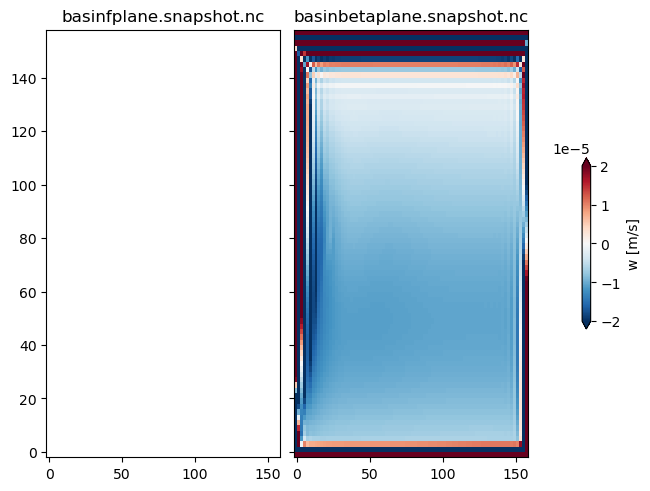

In [3]:
fig, axs = subplots_shared(1, 2)
for nn, td in enumerate(['basinfplane.snapshot.nc', 'basinbetaplane.snapshot.nc']):
    ax = axs[nn]
    with xr.open_dataset(td) as ds:
        display(ds)
        ds = ds.isel(Time=-100)
        pc = pcolormesh_sym(ds.xt, ds.yt, ds.w.isel(zw=-5), vbound=2e-5)
        ax.set_title(td)
fig.colorbar(pc, ax=axs, shrink=0.4, extend='both', label='w [m/s]')

First note that there is net upwelling at the sidewalls, which is expected because the rest of the basin is downwelling.

The Ekman pmping is stronger in the f-plane case than the beta-plane case as f increases to the north in the beta plane case (relatively quickly).

### Q1.1c Compare w/ Ekman Pumping

Compare the vertical velocity, say at x=75 km to the expected Ekman pumping velocity for both the f-plane and the beta-plane solutions

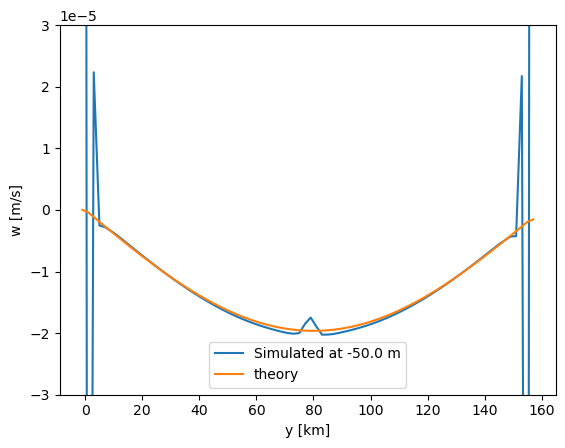

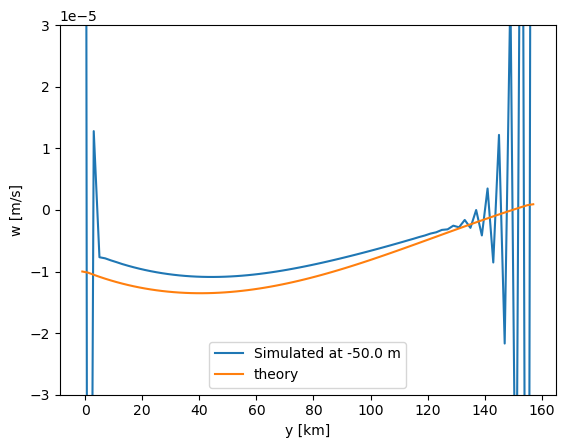

In [4]:
fig, ax = plt.subplots()
with xr.open_dataset('basinfplane.snapshot.nc') as ds:
    ds = ds.isel(Time=-1, xt=40, zw=-6)
    ax.plot(ds.yt, ds.w, label=f'Simulated at {ds.zw.values} m')
    ax.set_ylim([-3e-5, 3e-5])
    ax.set_xlabel('y [km]')
    ax.set_ylabel('w [m/s]')
    tau = (np.sin((ds.yt - 80)/ 160*np.pi) * 0.1) / 1000
    f = 1e-4
    w = -tau.differentiate(coord='yt') / f / 1000
    ax.plot(ds.yt, w, label='theory')
    ax.legend()

fig, ax = plt.subplots()
with xr.open_dataset('basinbetaplane.snapshot.nc') as ds:
    ds = ds.isel(Time=-10, xt=40, zw=-6)
    ax.plot(ds.yt, ds.w, label=f'Simulated at {ds.zw.values} m')
    ax.set_ylim([-3e-5, 3e-5])
    ax.set_xlabel('y [km]')
    ax.set_ylabel('w [m/s]')
    tau = (np.sin((ds.yt - 80)/ 160*np.pi) * 0.1) / 1000
    f = 1e-4 + 1e-9 * ds.yt * 1000
    w = -(tau/f).differentiate(coord='yt')/ 1000 
    ax.plot(ds.yt, w, label='theory')
    ax.legend()

Both vertical velocities are in relatively good agreement with the theory.  The beta-plane vertical velocity is less than expected, though the shape is quite similar.  

## Q1.2 Sverdrup transport

Fro the beta plane, calculate the vertically integrated transport across the middle latitude as a function of x, and compare to the Sverdrup transport.

<xarray.DataArray 'surface_taux' (xu: 80)>
array([-1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, 

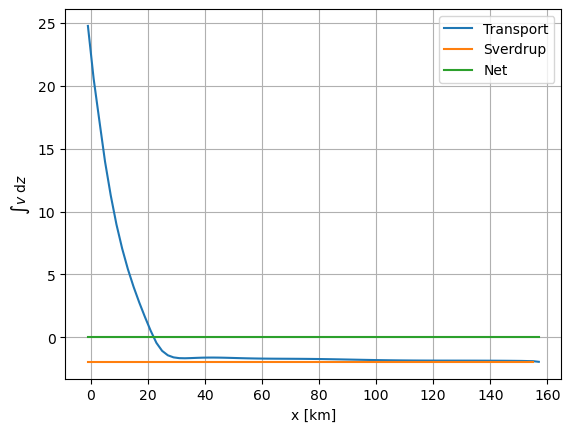

In [5]:
with xr.open_dataset('basinbetaplane.snapshot.nc') as ds:
    ds = ds.isel(Time=-1)
    fig, ax = plt.subplots()
    trans = ds.v.isel(yu=40).sum(dim='zt')*10
    ax.plot(ds.xt, ds.v.isel(yu=40).sum(dim='zt')*10, label=f'Transport')
    ax.grid('on')
    # the sverdrup transport is -(1/rho) dtau/dy / \beta
    Sverdrup = -ds.surface_taux.differentiate(coord='yt').isel(yt=40) / 1e-9 / 1000 / 1000
    print(Sverdrup)
    ax.plot(ds.xt, Sverdrup, label='Sverdrup')
    ax.plot(ds.xt, 0*ds.xt + ds.v.isel(yu=40).sum(dim='zt').mean(dim='xt')*10, label=f'Net')
    ax.legend()
    ax.set_xlabel('x [km]')
    ax.set_ylabel(r'$\int v\ \mathrm{d}z$')

<xarray.DataArray 'surface_taux' (yt: 80, xu: 80)>
array([[-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        ,         nan],
       [-0.03854076, -0.03854076, -0.03854076, ..., -0.03854076,
        -0.03854076,         nan],
       [-0.11556285, -0.11556285, -0.11556285, ..., -0.11556285,
        -0.11556285,         nan],
       ...,
       [-0.26895396, -0.26895396, -0.26895396, ..., -0.26895396,
        -0.26895396,         nan],
       [-0.19240674, -0.19240674, -0.19240674, ..., -0.19240674,
        -0.19240674,         nan],
       [-0.15404418, -0.15404418, -0.15404418, ..., -0.15404418,
        -0.15404418,         nan]])
Coordinates:
  * xu       (xu) float64 0.0 2.0 4.0 6.0 8.0 ... 150.0 152.0 154.0 156.0 158.0
  * yt       (yt) float64 -1.0 1.0 3.0 5.0 7.0 ... 149.0 151.0 153.0 155.0 157.0
    Time     timedelta64[ns] 10 days


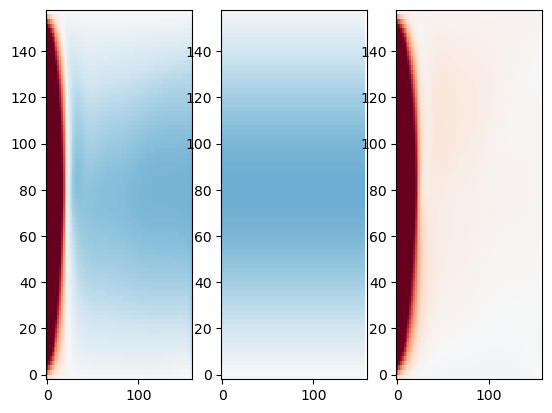

In [6]:
with xr.open_dataset('basinbetaplane.snapshot.nc') as ds:
    ds = ds.isel(Time=-1)
    fig, axs = plt.subplots(1, 3)
    trans = ds.v.sum(dim='zt')*10
    pcolormesh_sym(ds.xu, ds.yt, ds.v.sum(dim='zt')*10, vbound=4, ax=axs[0])
    #ax.plot(ds.xt, ds.v.isel(yu=40).sum(dim='zt')*10, label=f'Transport')
    ax.grid('on')
    # the sverdrup transport is -(1/rho) dtau/dy / \beta
    Sverdrup = -ds.surface_taux.differentiate(coord='yt')/ 1e-9 / 1000 / 1000
    pcolormesh_sym(ds.xu, ds.yt, Sverdrup, vbound=4, ax=axs[1])
    pcolormesh_sym(ds.xu, ds.yt, ds.v.sum(dim='zt')*10 - Sverdrup.values, vbound=4, ax=axs[2])
    print(Sverdrup)
    #ax.plot(ds.xt, Sverdrup, label='Sverdrup')
    #ax.plot(ds.xt, 0*ds.xt + ds.v.isel(yu=40).sum(dim='zt').mean(dim='xt')*10, label=f'Net')
    #ax.legend()
    #ax.set_xlabel('x [km]')
    #ax.set_ylabel(r'$\int v\ \mathrm{d}z$')

So the above shows that the Sverdrup transport is almost perfect, except on the wester side of the basin, where there is the strong return flow.  Note that the net transport is zero, as one would expect.  

### Q1.2b Now plot what this transport looks like as a function of x and y

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<xarray.DataArray 'surface_taux' (xu: 80)>
array([-1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, -1.9626124, -1.9626124, -1.9626124, -1.9626124,
       -1.9626124, 

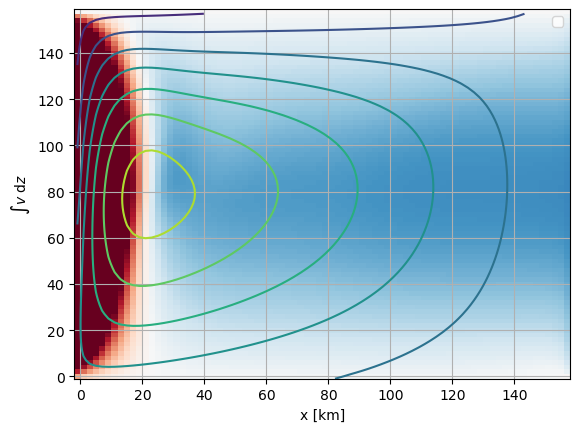

In [7]:
with xr.open_dataset('basinbetaplane.snapshot.nc') as ds:
    ds = ds.isel(Time=-1)
    fig, ax = plt.subplots()
    trans = ds.v.isel(yu=40).sum(dim='zt')*10
    pcolormesh_sym(ds.xt, ds.yu, ds.v.sum(dim='zt')*10, vbound=3)
    ax.contour(ds.xt, ds.yt, ds.psi)
    ax.grid('on')
    # the sverdrup transport is -(1/rho) dtau/dy / \beta
    Sverdrup = -ds.surface_taux.differentiate(coord='yt').isel(yt=40) / 1e-9 / 1000 / 1000
    print(Sverdrup)
    ax.legend()
    ax.set_xlabel('x [km]')
    ax.set_ylabel(r'$\int v\ \mathrm{d}z$')

Note that this generally makes sense, with higher transport near the center where $\frac{1}{\rho}\nabla \times \mathbf{\tau}$ is the most negative.  There is some cross-channel variability, with evidence of a heightened recirculation near the return flow along the western boundary.

## Q1.3 Western boundary current

### Q1.3.a

Plot the Sverdrup transport due to the north/south bottom stress, bearing in mind that it is quadratic with $\tau_b^y/\rho = -C_D v|v|$, where $C_D = 10^{-1}$. (This is actually an approximation - it should be $\tau_b^y/\rho = -C_D v|\mathbf{u}|$, but the x-direction velocity is relatively modest).  Compare to the volumn transport as you did above and comment.


Text(0.5, 1.0, 'Sverdrup transport due to bottom stress')

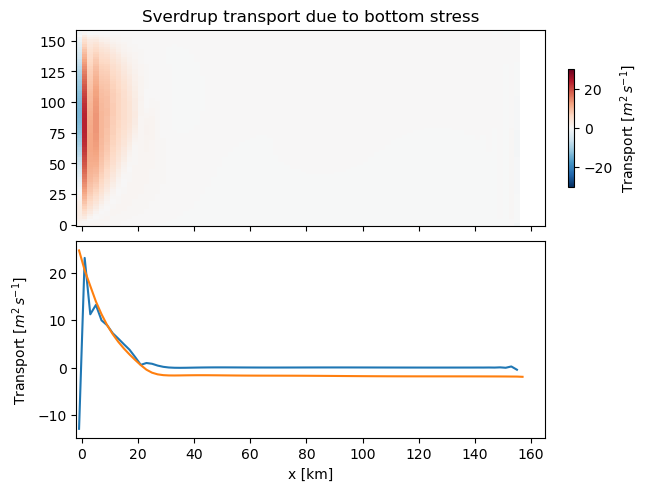

In [8]:
Cd = 1e-1
with xr.open_dataset('basinbetaplane.snapshot.nc') as ds:
    ds = ds.isel(Time=-1)
    taub = -Cd * ds.v.isel(zt=0) * np.abs(ds.v.isel(zt=0))
    fig, axs = subplots_shared(2, 1, sharey=False)
    pc = pcolormesh_sym(ds.xt[:-1], ds.yu, taub.diff(dim='xt') / 2000 / 1e-9, 30, ax=axs[0])
    fig.colorbar(pc, ax=axs[0], shrink=0.6, label='Transport $[m^2\,s^{-1}]$')
    ax = axs[1]
    ax.plot(ds.xt[:-1], taub.diff(dim='xt')[40, :] / 2000 / 1e-9)
    ax.plot(ds.xt, ds.v.isel(yu=40).sum(dim='zt')*10, label=f'Transport')

ax.set_xlabel('x [km]')
ax.set_ylabel('Transport $[m^2\,s^{-1}]$')
axs[0].set_title('Sverdrup transport due to bottom stress')

Clearly the transport due to the bottom torque almost balances the transport, and adding the interior transport due to the wind stress will give the total transport..

### Q1.3.b if return current on other side? 

Comment on the sense of torque if the return current were on the other side of the basin?

The velocity gradient will be with strongest northward flow to the east, so the bottom stress will increase towards the south towards the east.  This is a negative torque, which will tend to drive a southward Sverdrup transport.

### Q1.3.c East/west flow

Comment on the sense of the east/west flow in the basin in relation to the net north/south flow.

If the flow is southwards everywhere except the western boundary current, then there needs to be a flow from the west to east in the north half of the basin to compensate.  Water piles up in the south side of the basin due to flow convergence, so it needs to be trasnported from the east to west.

## Q2 Planetary waves: Qualitative

### Q2.1 Poincarre versus Kelvin waves. 

Run [Poincarre12.py](Poincarre12.py) and [Kelvin40.py](Kelvin40.py).  They are forced exactly the same way, by a Gaussian-shaped alternation of a wind stress at the east side of the basin. This is run in a 200-m deep ocean, with the upper 60 m at 30 degrees C, and the bottom 140 m at 10 degrees C.  

[Poincarre12.py](Poincarre12.py) is forced with a 12-h forcing period - note that the Coriolis period is $T = \frac{2\pi}{f} = 17.45 h$, so these waves are "super-inertial".  [Kelvin40.py](Kelvin40.py) is forced at 40 h, so these waves are sub-inertial.  

Plot some time snaps of u or v near the surface. Describe the difference between the two forcings. 

```{note}
The dominant response will be "internal waves" where the interface between the 10 and 30 degree water moves up and down.  The buoyancy effect is such that these waves see a reduced gravity of $g' \approx \frac{\delta \rho}{\rho} g \approx 0.0382 \ \mathrm{m\, s^{-2}}$.

```

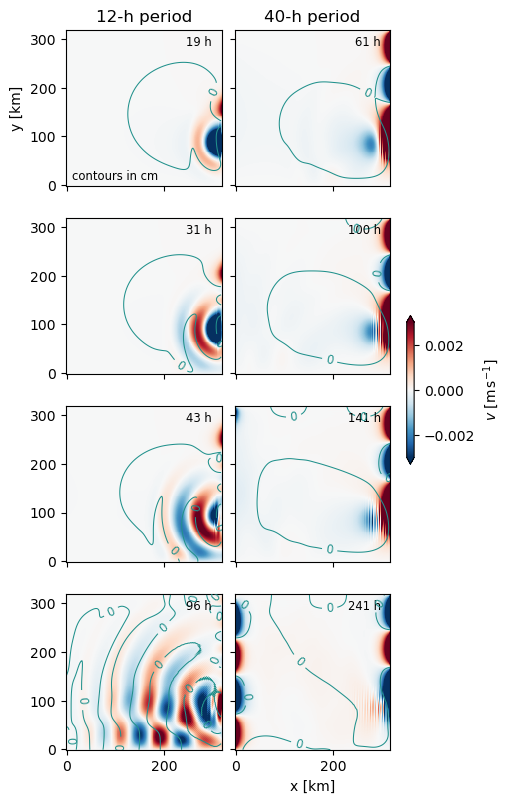

In [9]:
todo = ['Poincarre12.snapshot.nc', 'Kelvin40.snapshot.nc']
times = [[18, 30, 42, -1], [60, 100, 140, -1]]

fig, axs = subplots_shared(4, 2, figsize=(5, 8))

for nn, td in enumerate(todo):
    for nt, time in enumerate(times[nn]):
        ax = axs[nt, nn]
        with xr.open_dataset(td) as ds:
            ds = ds.isel(Time=time)
            ttime = int(ds.Time.astype('float').values / 1e9 / 3600)
            levels = np.arange(-20, 20, 4)
            cont = ax.contour(ds.xt, ds.yt, ds.psi * 100, levels=levels, linewidths=0.75, vmin=-16, vmax=16)
            cs = pcolormesh_sym(ds.xt, ds.yu, ds.v.isel(zt=-2), vbound=0.003, cmap='RdBu_r', ax=ax )
            ax.set_aspect(1)
            ax.clabel(cont, levels=levels[1::2], fontsize='small')
            ax.text(0.94, 0.9, f'{ttime} h', transform=ax.transAxes, fontsize='small', ha='right')
axs[0, 0].set_title('12-h period')
axs[0, 0].text(0.04, 0.04, 'contours in cm', transform=axs[0, 0].transAxes, fontsize='small')
axs[0, 1].set_title('40-h period')
axs[0, 0].set_ylabel('y [km]')
axs[-1, -1].set_xlabel('x [km]')
fig.colorbar(cs, ax=axs, shrink=0.2, extend='both', label='$v\ \mathrm{[m\,s^{-1}]}$')

In [10]:
if False:
    todo = ['Poincarre12.snapshot.nc', 'Kelvin40.snapshot.nc']
    times = [[18, 30, 42, -1], [60, 100, 140, -1]]

    with xr.open_dataset(td) as ds0:
        times = ds0.Time

    for nt, time in enumerate(times):
        fig, axs = subplots_shared(1, 2, figsize=(5, 4))
        for nn, td in enumerate(todo):
            ax = axs[nn]
            with xr.open_dataset(td) as ds:
                ds = ds.isel(Time=nt)
                ttime = int(ds.Time.astype('float').values / 1e9 / 3600)
                levels = np.arange(-20, 20, 4)
                cont = ax.contour(ds.xt, ds.yt, ds.psi * 100, levels=levels, linewidths=0.75, vmin=-16, vmax=16)
                cs = pcolormesh_sym(ds.xt, ds.yu, ds.v.isel(zt=-2), vbound=0.003, cmap='RdBu_r', ax=ax )
                ax.set_aspect(1)
                #ax.clabel(cont, levels=levels[1::2], fontsize='small')
                ax.text(0.94, 0.9, f'{ttime} h', transform=ax.transAxes, fontsize='small', ha='right')
        axs[0].set_title('12-h period')
        axs[1].set_title('40-h period')
        axs[0].set_ylabel('y [km]')
        axs[-1].set_xlabel('x [km]')
        fig.colorbar(cs, ax=axs, shrink=0.2, extend='both', label='$v\ \mathrm{[m\,s^{-1}]}$')
        fig.savefig(f'KW{nt:04d}.png', dpi=100)
        plt.close('all')

Both flows demonstrate waves propaagating along the side walls.  However, the super-inertial flow _also_ has a flow that propagates across the basin.  The wall-trapped waves are Kelvin waves and the propagating waves are Poincarre waves.  If the forcing is sub-inertial, free waves are not a possible solution.  

### Q2.2 Rossby waves

Run [Rossby200.py](Rossby200.py), [Rossby300.py](Rossby300.py), [Rossby400.py](Rossby400.py).  These simulations are substantially larger, and have no temperature stratification - the waves excited are on the surface rather than an interface.  If the forcing is slow and large scale, we generate Rossby waves.  Here the wave maker is in the middle of the basin rather than along an edge.

Compare the response of these three simulations at a few time steps

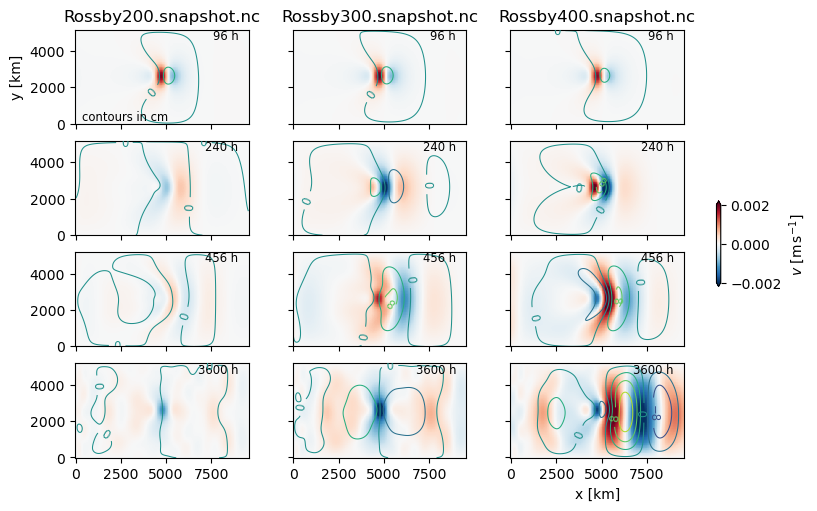

In [11]:
todo = ['Rossby200.snapshot.nc', 'Rossby300.snapshot.nc', 'Rossby400.snapshot.nc']
times = [[3, 9, 18, -1], [3, 9, 18, -1], [3, 9, 18, -1] ]
vbound = [0.0005, 0.01, 0.01]

fig, axs = subplots_shared(4, 3, figsize=(8, 5))

for nn, td in enumerate(todo):
    for nt, time in enumerate(times[nn]):
        ax = axs[nt, nn]
        with xr.open_dataset(td) as ds:
            ds = ds.isel(Time=time)
            ttime = int(ds.Time.astype('float').values / 1e9 / 3600)
            levels = np.arange(-20, 20, 4)
            cont = ax.contour(ds.xt, ds.yt, ds.psi * 100, levels=levels, linewidths=0.75, vmin=-16, vmax=16)
            cs = pcolormesh_sym(ds.xt, ds.yu, ds.v.isel(zt=-2), vbound=0.002, cmap='RdBu_r', ax=ax )
            ax.set_aspect(1)
            ax.clabel(cont, levels=levels[1::2], fontsize='small')
            ax.text(0.94, 0.9, f'{ttime} h', transform=ax.transAxes, fontsize='small', ha='right')
            if nt == 0:
                ax.set_title(td)
#axs[0, 0].set_title('f-plane')
axs[0, 0].text(0.04, 0.04, 'contours in cm', transform=axs[0, 0].transAxes, fontsize='small')
#axs[0, 1].set_title('$\\beta$-plane')
axs[0, 0].set_ylabel('y [km]')
axs[-1, -1].set_xlabel('x [km]')
fig.colorbar(cs, ax=axs, shrink=0.2, extend='both', label='$v\ \mathrm{[m\,s^{-1}]}$')

There is clearly wave energy radiating to the east in these simulations, but also a weaker forcing to the west.  The 200-h period simulation has a much weaker response than the other two, which we will see is due to the forcing being shorter period than the minimum period allowable for Rossby waves - what gets excited is really a harmonic at 400 h. 

### Q2.2b Hovmoller

Its a little hard to see the wave propagation in the above because the waves are so long relative to the basin size.  Plot each simulation using a Hovmoller diagram, probably at the middle value of y (`.isel(yt=35, yu=35)`).

Try to interpret this - consider two things - phase speeds are set by the slope of the alternating bands.  Group speed, which is the speed energy is propagating, is set by the slope of increasing amplitude of the waves.  Try to pick these features out of the Hovmoller diagrams.

Text(0, 0.5, 'Time [h]')

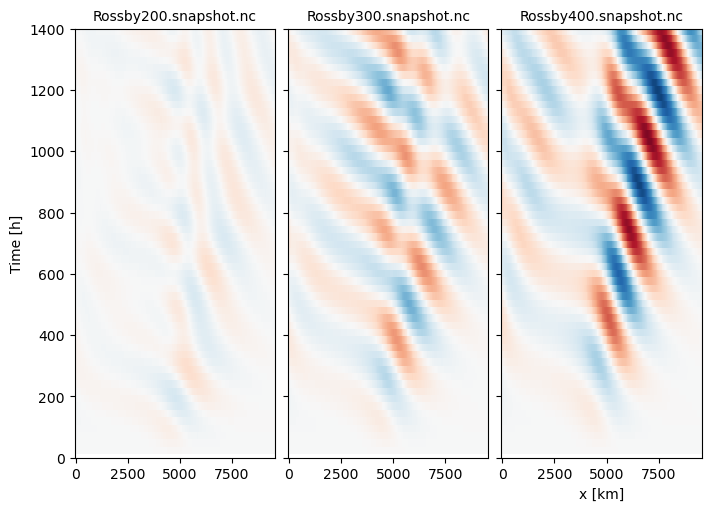

In [12]:
todo = ['Rossby200.snapshot.nc', 'Rossby300.snapshot.nc', 'Rossby400.snapshot.nc']
fig, axs = subplots_shared(1, 3, figsize=(7, 5))

for nn, td in enumerate(todo):
    ax = axs[nn]
    with xr.open_dataset(td) as ds:
        ds = ds.isel(yt=35, yu=35, zt=-2, zw=-2)
        time = tohours(ds.Time)
        pcolormesh_sym(ds.xt, time, ds.v, vbound=0.002, ax=ax)
        ax.set_ylim([0, 1400])
        ax.set_title(td, fontsize='medium')
axs[-1].set_xlabel('x [km]')
axs[0].set_ylabel('Time [h]')

The 400-h and 300-h simulations are the clearest.  Wave energy is clearly propagaing to the east.  But the phase lines are propagating to the west.  

To the west of the wave source, the phase velocity is slow to the west, and then it becomes faster to the west.  This is somewhat confusing, but is due to a reflection from the western wall.  The initial waves to the west, with the lower slope have _much_ longer horizontal wavelengths than the waves propagating to the east. 


## Make movies

In [13]:
If False:
    todo = ['Rossby200.snapshot.nc', 'Rossby300.snapshot.nc', 'Rossby400.snapshot.nc']
    times = [[3, 9, 18, -1], [3, 9, 18, -1], [3, 9, 18, -1] ]
    vbound = [0.0005, 0.01, 0.01]


    ds0 = xr.open_dataset(todo[0])
    for nt, time in enumerate(ds0.Time):
        fig, axs = subplots_shared(1, 3, figsize=(9, 3))
        for nn, td in enumerate(todo):
            ax = axs[nn]
            with xr.open_dataset(td) as ds0:
                ds = ds0.isel(Time=nt)
                ttime = int(ds.Time.astype('float').values / 1e9 / 3600)
                levels = np.arange(-20, 20, 4)
                cont = ax.contour(ds.xt, ds.yt, ds.psi * 100, levels=levels, linewidths=0.75, vmin=-16, vmax=16)
                cs = pcolormesh_sym(ds.xt, ds.yu, ds.v.isel(zt=-2), vbound=0.002, cmap='RdBu_r', ax=ax )
                ax.set_aspect(1)
                # ax.clabel(cont, levels=levels[1::2], fontsize='small')
                ax.text(0.94, 0.9, f'{ttime} h', transform=ax.transAxes, fontsize='small', ha='right')
        #axs[0, 0].set_title('f-plane')
        axs[0].text(0.04, 0.04, 'contours in cm', transform=axs[0].transAxes, fontsize='small')
        #axs[0, 1].set_title('$\\beta$-plane')
        axs[0].set_ylabel('y [km]')
        axs[-1].set_xlabel('x [km]')
        fig.colorbar(cs, ax=axs, shrink=0.2, extend='both', label='$v\ \mathrm{[m\,s^{-1}]}$')
        fig.savefig(f'Snapshot{nt:04d}.png', dpi=100)
        plt.close('all')
        fig.clear()
        del fig

SyntaxError: invalid syntax (547994714.py, line 1)